# A/B Test Visualization

This notebook presents the final visualizations for the first-order discount A/B test. It summarizes the results of the experiment to provide actionable insights for business stakeholders. The analysis focuses on whether offering higher discounts (10%, 20%, 30%) significantly increases first-order GMV compared to no discount (0%).

## Load Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load prepared first order data
df_first = pd.read_csv('/Users/Cathaml/Desktop/first_orders_with_group.csv')

# Load uplift summary (optional)
uplift_vs_control = pd.read_csv('/Users/Cathaml/Desktop/gmv_uplift_summary.csv', index_col=0)

## Filter Delivered Orders
Only successfully delivered first orders are included, as they generate real revenue.

In [8]:
df_first = df_first[df_first['Order Status'] == 'Delivered'].copy()
print(f"Delivered first orders: {df_first.shape[0]}")

Delivered first orders: 11497


11,497 delivered first orders are included in this visualization.

## Group Size Barplot

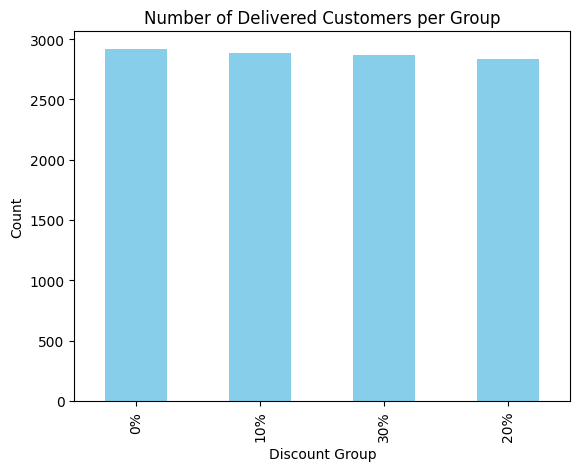

In [9]:
group_counts = df_first['group_label'].value_counts()

group_counts.plot(kind='bar', color='skyblue', title='Number of Delivered Customers per Group', ylabel='Count', xlabel='Discount Group')
plt.show()

The four discount groups are very well balanced, with approximately 2800-2900 delivered orders per group. This confirms the A/B test was designed properly, with even sample sizes — ensuring comparability between groups.

## GMV Distribution — Boxplot

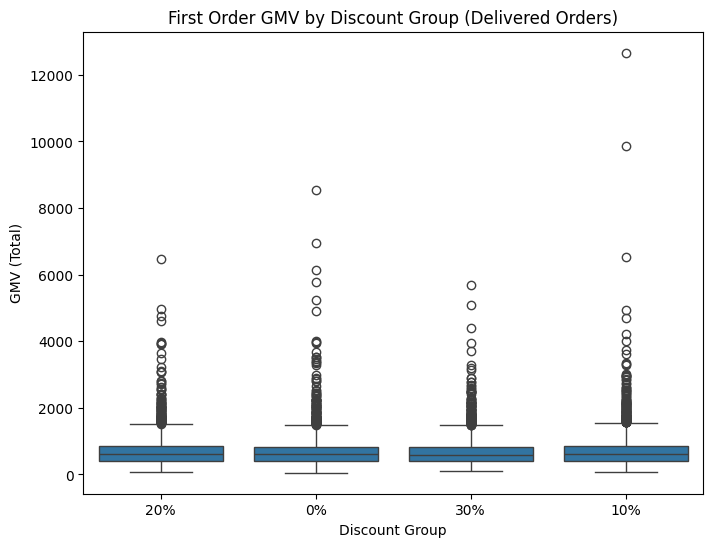

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x='group_label', y='Total', data=df_first)
plt.title('First Order GMV by Discount Group (Delivered Orders)')
plt.ylabel('GMV (Total)')
plt.xlabel('Discount Group')
plt.show()

The boxplot shows that the GMV distributions are broadly similar across groups. Median GMV values do not show significant variation with increasing discount. All groups exhibit natural outliers (large orders), but the spread and central tendency of GMV appear relatively stable regardless of discount level.

## GMV Uplift vs Control — Barplot

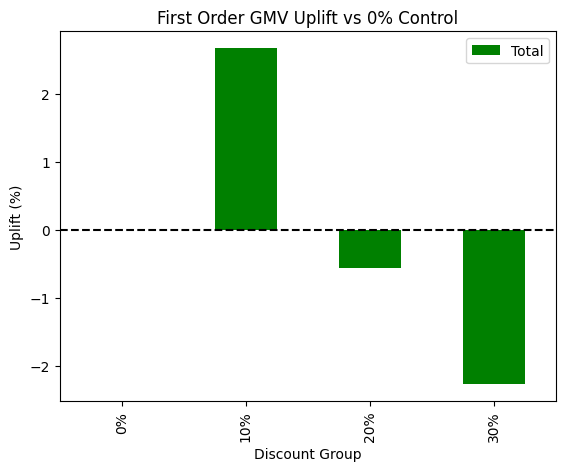

In [13]:
uplift_vs_control.plot(kind='bar', color='green', title='First Order GMV Uplift vs 0% Control', ylabel='Uplift (%)', xlabel='Discount Group')
plt.axhline(0, color='black', linestyle='--')
plt.show()

The 10% discount produced a small positive uplift in GMV (+2.67%) relative to the 0% control group. In contrast, the 20% and 30% discounts led to negative uplift, reducing GMV relative to the control. These results suggest that offering larger discounts does not improve revenue, and may even erode profitability.

## GMV Mean with Error Bars

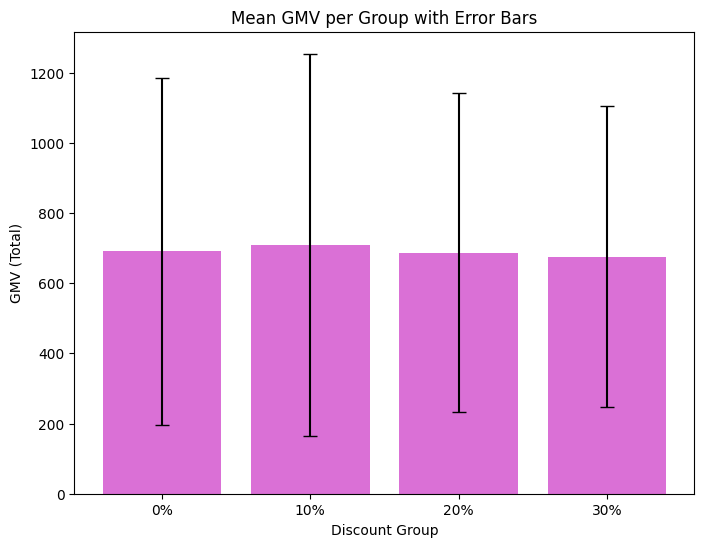

In [14]:
gmv_mean = df_first.groupby('group_label')['Total'].mean()
gmv_std = df_first.groupby('group_label')['Total'].std()

plt.figure(figsize=(8,6))
plt.bar(gmv_mean.index, gmv_mean.values, yerr=gmv_std.values, color='orchid', capsize=5)
plt.title('Mean GMV per Group with Error Bars')
plt.ylabel('GMV (Total)')
plt.xlabel('Discount Group')
plt.show()

Mean GMV values across groups are very close, with error bars (±1 standard deviation) overlapping substantially. This visual confirms that the variation within groups is relatively large compared to the differences between groups — consistent with the statistical test results. The differences in GMV between groups are not statistically significant, except for the contrast between 10% vs 30%.

## Final Insights
1. The test included 11,497 delivered first orders across four balanced discount groups.
2. The 10% discount produced a small positive uplift in GMV (+2.67%), but the effect was not statistically significant.
3. Both the 20% and 30% discounts resulted in reduced GMV compared to the 0% control group.
4. The charts confirm that larger discounts do not improve GMV and may harm profitability.

**Business Recommendation**:
Offering a 10% first-order discount appears to be an optimal strategy for customer acquisition. Higher discounts (20%, 30%) do not provide measurable benefit and are not recommended.